# Clustering

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

## Loading the data

In [2]:
from helpers.model import get_basic_track_features, get_track_data
from helpers import get_global_charts

global_charts = get_global_charts()
track_feats = get_basic_track_features()
tracks = get_track_data()

In [3]:
global_chart_track_features = track_feats[track_feats.index.isin(global_charts["id"])]
global_chart_track_features

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,single_release
id,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,False,0.748,0.627,7.0,-6.029,1.0,0.0639,0.13100,0.000000,0.0852,0.524,120.963,188491.0,4.0,True
00Blm7zeNqgYLPtW6zg8cj,True,0.687,0.781,1.0,-4.806,1.0,0.0530,0.03610,0.000000,0.0755,0.688,97.014,193507.0,4.0,True
00ko9WaS4jOX1kEk3gvHjf,True,0.899,0.509,9.0,-8.040,1.0,0.3870,0.00157,0.000000,0.0573,0.599,150.001,225924.0,4.0,False
00lNx0OcTJrS3MKHcB80HY,True,0.876,0.669,11.0,-6.054,0.0,0.1380,0.16300,0.000000,0.1850,0.682,124.007,213947.0,4.0,True
017PF4Q3l4DBUiWoXk4OWT,False,0.730,0.729,4.0,-3.434,0.0,0.0884,0.16700,0.000001,0.3490,0.467,113.011,221820.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,True,0.886,0.525,8.0,-7.390,1.0,0.1310,0.23600,0.000000,0.0570,0.708,145.990,225205.0,4.0,False
7z4xW9WY86uH3gd1V9pfCM,True,0.827,0.571,11.0,-7.949,1.0,0.3660,0.01950,0.000000,0.1660,0.620,142.034,146419.0,4.0,False
7zLGHiDWd9T1Rxw4PQCb13,True,0.577,0.593,9.0,-4.816,0.0,0.1370,0.80000,0.000000,0.6230,0.575,120.611,303781.0,5.0,True


## Data preprocessing

In [4]:
global_chart_track_features.isna().sum()

explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
single_release      0
dtype: int64

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(global_chart_track_features)

In [14]:
scaled_features.dtype

dtype('float64')

In [6]:
def optimise_k_means(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=2022)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), inertias)
    plt.xticks(range(1, max_k + 1))
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()

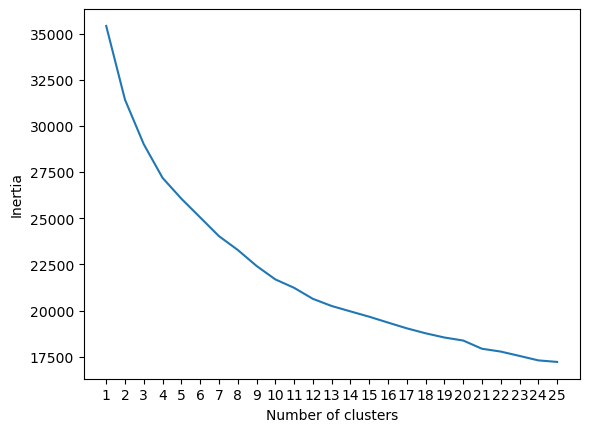

In [16]:
optimise_k_means(scaled_features, max_k=25)

In [26]:
kmeans = KMeans(n_clusters=9, random_state=2022)

In [27]:
kmeans.fit(scaled_features)

KMeans(n_clusters=9, random_state=2022)

In [28]:
result_df = pd.DataFrame(
    scaled_features,
    columns=[col + "_standardized" for col in global_chart_track_features.columns],
    index=global_chart_track_features.index,
)
result_df


,explicit_standardized,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized,duration_ms_standardized,time_signature_standardized,single_release_standardized
id,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,-0.911171,0.483617,0.036669,0.522176,0.182911,0.844602,-0.514923,-0.422060,-0.14994,-0.685078,0.196500,-0.016206,-0.329671,0.099907,1.296113
00Blm7zeNqgYLPtW6zg8cj,1.097489,0.052971,0.985293,-1.106075,0.663572,0.844602,-0.606096,-0.802654,-0.14994,-0.755352,0.930366,-0.822930,-0.228708,0.099907,1.296113
00ko9WaS4jOX1kEk3gvHjf,1.097489,1.549643,-0.690199,1.064926,-0.607449,0.844602,2.187629,-0.941136,-0.14994,-0.887207,0.532109,0.961942,0.423789,0.099907,-0.771538
00lNx0OcTJrS3MKHcB80HY,1.097489,1.387268,0.295385,1.607677,0.173085,-1.183989,0.104882,-0.293724,-0.14994,0.037951,0.903517,0.086332,0.182713,0.099907,1.296113
017PF4Q3l4DBUiWoXk4OWT,-0.911171,0.356541,0.664979,-0.291950,1.202793,-1.183989,-0.309994,-0.277682,-0.14992,1.226095,-0.058563,-0.284069,0.341183,0.099907,-0.771538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,1.097489,1.457866,-0.591641,0.793551,-0.351987,0.844602,0.046331,-0.000959,-0.14994,-0.889380,1.019861,0.826831,0.409317,0.099907,-0.771538
7z4xW9WY86uH3gd1V9pfCM,1.097489,1.041339,-0.308285,1.607677,-0.571684,0.844602,2.011976,-0.869228,-0.14994,-0.099700,0.626080,0.693573,-1.176506,0.099907,-0.771538
7zLGHiDWd9T1Rxw4PQCb13,1.097489,-0.723605,-0.172768,1.064926,0.659642,-1.183989,0.096518,2.260953,-0.14994,3.211164,0.424714,-0.028063,1.990913,3.469637,1.296113


In [29]:
result_df["label"] = kmeans.labels_
result_df

,explicit_standardized,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized,duration_ms_standardized,time_signature_standardized,single_release_standardized,label
id,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,-0.911171,0.483617,0.036669,0.522176,0.182911,0.844602,-0.514923,-0.422060,-0.14994,-0.685078,0.196500,-0.016206,-0.329671,0.099907,1.296113,6
00Blm7zeNqgYLPtW6zg8cj,1.097489,0.052971,0.985293,-1.106075,0.663572,0.844602,-0.606096,-0.802654,-0.14994,-0.755352,0.930366,-0.822930,-0.228708,0.099907,1.296113,6
00ko9WaS4jOX1kEk3gvHjf,1.097489,1.549643,-0.690199,1.064926,-0.607449,0.844602,2.187629,-0.941136,-0.14994,-0.887207,0.532109,0.961942,0.423789,0.099907,-0.771538,3
00lNx0OcTJrS3MKHcB80HY,1.097489,1.387268,0.295385,1.607677,0.173085,-1.183989,0.104882,-0.293724,-0.14994,0.037951,0.903517,0.086332,0.182713,0.099907,1.296113,4
017PF4Q3l4DBUiWoXk4OWT,-0.911171,0.356541,0.664979,-0.291950,1.202793,-1.183989,-0.309994,-0.277682,-0.14992,1.226095,-0.058563,-0.284069,0.341183,0.099907,-0.771538,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,1.097489,1.457866,-0.591641,0.793551,-0.351987,0.844602,0.046331,-0.000959,-0.14994,-0.889380,1.019861,0.826831,0.409317,0.099907,-0.771538,3
7z4xW9WY86uH3gd1V9pfCM,1.097489,1.041339,-0.308285,1.607677,-0.571684,0.844602,2.011976,-0.869228,-0.14994,-0.099700,0.626080,0.693573,-1.176506,0.099907,-0.771538,3
7zLGHiDWd9T1Rxw4PQCb13,1.097489,-0.723605,-0.172768,1.064926,0.659642,-1.183989,0.096518,2.260953,-0.14994,3.211164,0.424714,-0.028063,1.990913,3.469637,1.296113,8


In [30]:
track_genres_and_labels = pd.DataFrame(tracks.loc[:,"genres"]).join(result_df["label"], on="id", how="right")
track_genres_and_labels

,genres,label
id,,
000xQL6tZNLJzIrtIgxqSl,"[dance pop, pop, post-teen pop, uk pop, r&b, r...",6
00Blm7zeNqgYLPtW6zg8cj,"[dfw rap, melodic rap, rap, canadian contempor...",6
00ko9WaS4jOX1kEk3gvHjf,"[chicago rap, conscious hip hop, hip hop, pop ...",3
00lNx0OcTJrS3MKHcB80HY,"[dance pop, edm, electro house, house, pop, po...",4
017PF4Q3l4DBUiWoXk4OWT,"[dance pop, pop, uk pop]",4
...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,"[pop rap, rap, underground hip hop, virginia h...",3
7z4xW9WY86uH3gd1V9pfCM,"[hip hop, rap, melodic rap, philly rap, trap, ...",3
7zLGHiDWd9T1Rxw4PQCb13,"[detroit hip hop, hip hop, rap, dance pop, pop...",8


In [31]:
track_genres_and_labels.groupby("label").agg({"genres": lambda x: x.explode().value_counts().index[:3]})

,genres
label,
0,"[pop, rap, dance pop]"
1,"[pop, uk pop, dance pop]"
2,"[pop, rap, dance pop]"
3,"[rap, hip hop, trap]"
4,"[pop, dance pop, reggaeton]"
5,"[pop, art pop, electropop]"
6,"[pop, dance pop, post-teen pop]"
7,"[pop, rap, hip hop]"
8,"[rap, hip hop, pop]"
